<a href="https://colab.research.google.com/github/Jaimemorillo/ShouldIwatchThisMovie/blob/master/memoria_data_antes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## Fuente de datos

## Etiquetado

## Análisis

https://www.analyticsvidhya.com/blog/2020/04/beginners-guide-exploratory-data-analysis-text-data/

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np

from tqdm.notebook import tqdm
tqdm.pandas()

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import seaborn as sns
sns.set_style("white")
sns.set_context("notebook")

from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [13]:
dataover = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_def.csv", sep='#',encoding='utf-8', lineterminator='\n')
taste = pd.read_csv("gdrive/My Drive/TFG/tmdb_spanish_Jaime_def_2.csv", sep='#', encoding='utf-8')

In [16]:
taste['id'] = taste['id'].astype(int)

data = taste.merge(dataover[['id','title','overview','genres','crew','cast']], left_on='id', right_on='id')
data = data[~pd.isna(data.overview)]

data = data.dropna(subset=['like'])
data['like'] = data['like'].astype(int)

data = data.drop_duplicates(subset=['id'])
data.reset_index(inplace=True,drop=True)

print(len(data))

print(data.like.value_counts(dropna=False))

data = data.drop(columns=['genres', 'crew', 'cast'])

1015
0    514
1    501
Name: like, dtype: int64


In [18]:
print("Shape of data=>",data.shape)

Shape of data=> (1015, 4)


### Distribución

Bibligrafia 

https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

In [19]:
data['text_array'] = data.overview.str.split(" ")
data['n_words'] = data['text_array'].apply(lambda x: len(x))
data = data.drop(columns=['text_array'])
data = data[data['n_words']>15]

Text(0, 0.5, 'Películas')

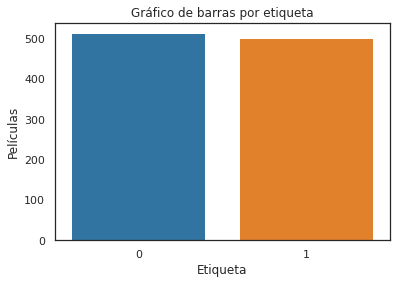

In [20]:
sns.countplot(x='like', data=data)
# Add labels
plt.title('Gráfico de barras por etiqueta')
plt.xlabel('Etiqueta')
plt.ylabel('Películas')

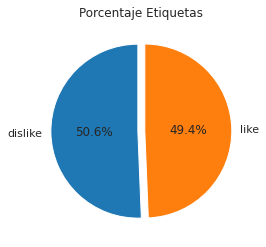

In [21]:
data.like.value_counts().plot(kind='pie', autopct="%.1f%%", 
                              pctdistance=0.5, explode=[0.04]*2, 
                              labels=['dislike', 'like'], 
                              title='Porcentaje Etiquetas', startangle=90, ylabel='')

In [ ]:
data.head(5)

,id,like,title,overview,n_words
0,11,1,La guerra de las galaxias. Episodio IV: Una nu...,"La princesa Leia, líder del movimiento rebelde...",87
1,12,1,Buscando a Nemo,"Nemo, un pececillo, hijo único muy querido y p...",69
2,13,1,Forrest Gump,Forrest Gump es un chico con deficiencias ment...,76
3,22,1,Piratas del Caribe. La maldición de la Perla N...,El aventurero Capitán Jack Sparrow recorre las...,103
4,24,1,Kill Bill: Volumen 1,"Uma Thurman es una asesina que, el día de su b...",54


In [22]:
pd.DataFrame(data.n_words.describe())

,n_words
count,1015.000000
mean,74.677833
std,33.943241
min,17.000000
25%,49.000000
50%,69.000000
75%,95.000000
max,179.000000


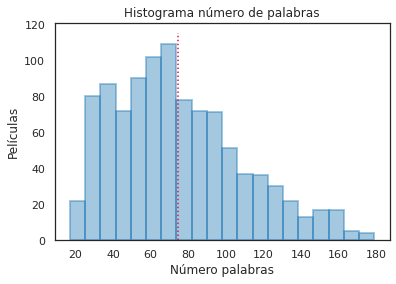

In [28]:
# seaborn histogram
sns.distplot(data['n_words'], hist=True, kde=False, 
             bins=20,
             hist_kws={'edgecolor':'tab:blue', 'linewidth': 2})
# Add labels
plt.title('Histograma número de palabras')
plt.xlabel('Número palabras')
plt.ylabel('Películas')

mean = data.n_words.mean()
plt.vlines(mean, 0, 115, color='crimson', ls=':')

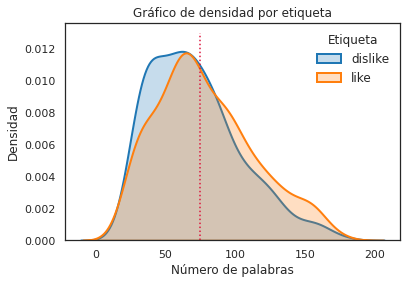

In [29]:
subset_0 = data[data['like'] == 0]
subset_1 = data[data['like'] == 1]
    
# Draw the density plot
sns.distplot(subset_0['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'dislike')

sns.distplot(subset_1['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'like')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por etiqueta')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = data.n_words.mean()
plt.vlines(mean, 0, 0.013, color='crimson', ls=':')

### Wordcloud

Bibligrafia 

https://towardsdatascience.com/generate-modern-stylish-wordcloud-with-stylecloud-9cbb059696d2

https://github.com/minimaxir/stylecloud


In [30]:
%pip install stylecloud

     |████████████████████████████████| 266kB 5.1MB/s 
     |████████████████████████████████| 163kB 5.8MB/s 
     |████████████████████████████████| 92kB 4.5MB/s 
     |████████████████████████████████| 92kB 4.5MB/s 
  Created wheel for stylecloud: filename=stylecloud-0.5.1-cp37-none-any.whl size=259507 sha256=70d2d68456520754ef3b38cce127a73957b1330c0c06562c9b2f5a13137a05d3
  Stored in directory: /root/.cache/pip/wheels/fb/19/e2/5e95c310c5a86586048ced770f35e60a8221be7ef0138f61ca
  Created wheel for fire: filename=fire-0.4.0-py2.py3-none-any.whl size=115928 sha256=b8a7a3c97f63bad6828d5e6d95021b4abca2d90454957ffa8c43686cc1c7d18b
  Stored in directory: /root/.cache/pip/wheels/af/19/30/1ea0cad502dcb4e66ed5a690279628c827aea38bbbab75d5ed
  Created wheel for tinycss: filename=tinycss-0.4-cp37-none-any.whl size=43942 sha256=5ee9056109e485b6b02622ffcecbb40dd88a08b90ab343bfa4b20603d69be1ac
  Stored in directory: /root/.cache/pip/wheels/1b/26/08/7390b2e6d5eb3403ef35647f09576459ca567d00ac725307d5

In [55]:
stop_words = pd.read_csv("gdrive/My Drive/TFG/stopwords-es.txt",header=None)
#stop_words = stop_words[0].tolist() 
stop_words = stop_words[0].tolist() + ['hombre', 'mujer']

In [56]:
from collections import Counter

text = " ".join(data.overview.values).lower()
myDict = Counter(text.split(" "))
df_words = pd.DataFrame(pd.Series(myDict), columns=['count'])
df_words = df_words.reset_index().rename(columns={'index': 'word'})
df_words = df_words[~df_words['word'].isin(stop_words)].sort_values('count', ascending=False)

new_stop_words = df_words[df_words['count']<=5].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']>5]

new_stop_words = df_words[df_words['count']>=100].word.to_list()
stop_words = stop_words + new_stop_words
df_words = df_words[df_words['count']<100]

In [57]:
import stylecloud

# Mirar como quitar acentos
stylecloud.gen_stylecloud(text = " ".join(data.overview.values), icon_name= "fas fa-ticket-alt",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_total.png')

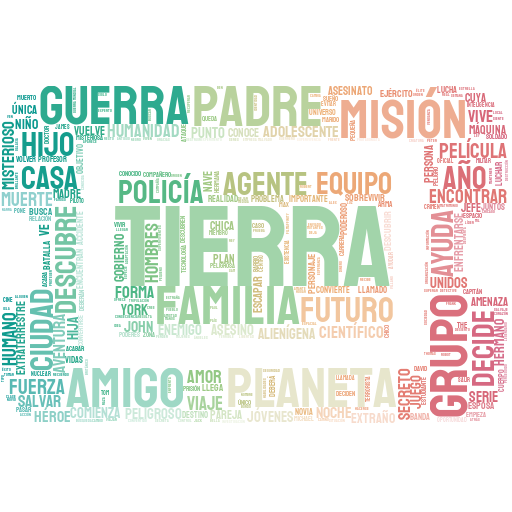

In [58]:
Image('/content/word_cloud_total.png')

In [59]:
stylecloud.gen_stylecloud(text = " ".join(subset_0.overview.values), icon_name= "fas fa-thumbs-down",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_0.png')

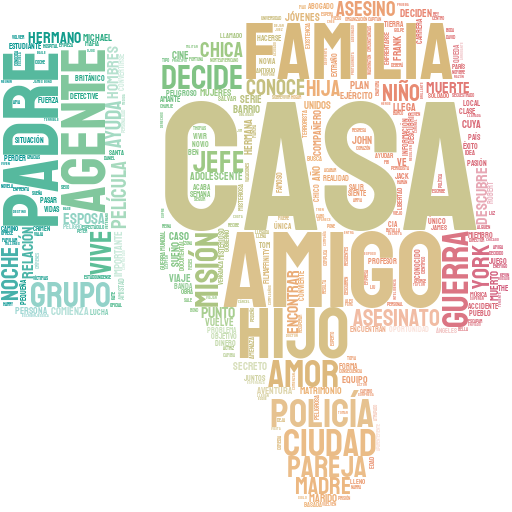

In [60]:
Image('/content/word_cloud_0.png')

In [61]:
stylecloud.gen_stylecloud(text = " ".join(subset_1.overview.values), icon_name="fas fa-thumbs-up",
                          palette='cartocolors.diverging.Temps_6',
                          background_color='white', custom_stopwords=stop_words,
                          gradient='horizontal',
                          random_state=1996,
                          output_name='word_cloud_1.png')

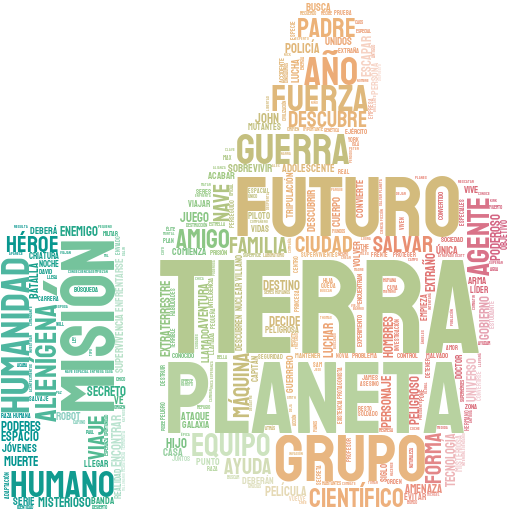

In [62]:
Image('/content/word_cloud_1.png')

## Splitting

We are going to split our dataset in three parts (Train, Test and Validation).
Each part must mantain the same distribution as the original dataset. Same number of 0's and 1's in "like" column. This is achieved by the stratify parameter. 
- Train: 60% of the dataset.
- Test 20% of the dataset.
- Val: 20% of the dataset.

In [63]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['like'])
y = data['like']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1996)

#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10/90, stratify=y_train, random_state=1996) 

In [65]:
print(len(X_train))
#print(len(X_val))
print(len(X_test))

812
203


In [66]:
my_dict = {
    'Train': len(X_train),
    'Test': len(X_test)#,
    #'Val': len(X_val)
    }
s_shape = pd.Series(data=my_dict)
s_shape.sum()

1015

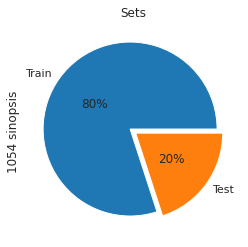

In [67]:
s_shape.plot(kind='pie', autopct="%.f%%", pctdistance=0.5, explode=[0.04]*2,
             title='Sets', figsize=(4,4),
             ylabel='1054 sinopsis', startangle=0)

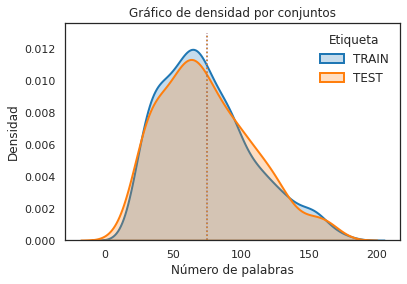

In [68]:
# Draw the density plot general
sns.distplot(X_train['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'TRAIN')

sns.distplot(X_test['n_words'], hist = False, kde = True,
             kde_kws = {'linewidth': 2, 'shade': True},
             label = 'TEST')    

#sns.distplot(X_val['n_words'], hist = False, kde = True,
#             kde_kws = {'linewidth': 2, 'shade': True},
#             label = 'VAL')    

# Plot formatting
plt.legend(prop={'size': 12}, title = 'Etiqueta')
plt.title('Gráfico de densidad por conjuntos')
plt.xlabel('Número de palabras')
plt.ylabel('Densidad')

mean = X_train.n_words.mean()
plt.vlines(mean, 0, 0.013, color='blue', ls=':')
mean = X_test.n_words.mean()
plt.vlines(mean, 0, 0.013, color='orange', ls=':')
#mean = X_val.n_words.mean()
#plt.vlines(mean, 0, 0.013, color='green', ls=':')

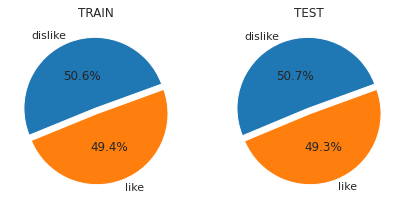

In [69]:
fig, axs = plt.subplots(nrows=1, ncols=2)

y_train.value_counts().plot(kind='pie', autopct="%.1f%%", 
                            pctdistance=0.5, explode=[0.04]*2, 
                            labels=['dislike', 'like'], 
                            title='TRAIN', figsize=(7,7),
                            ylabel='', ax=axs[0], startangle=20)

y_test.value_counts().plot(kind='pie', autopct="%.1f%%", 
                            pctdistance=0.5, explode=[0.04]*2, 
                            labels=['dislike', 'like'], 
                            title='TEST', 
                            ylabel='', ax=axs[1], startangle=20)

#y_val.value_counts().plot(kind='pie', autopct="%.1f%%", 
#                            pctdistance=0.5, explode=[0.04]*2, 
#                            labels=['dislike', 'like'], 
#                            title='VAL', 
#                            ylabel='', ax=axs[1,0], startangle=20)

Podemos ver que las distribuciones son exactamente iguales en los tres conjuntos tanto para la longitud de las sinopsis(gráfico de densidad) como para las proporciones de etiquetas (gráficos de tartas).

You can see that the ratio is the same in the three cases and between test and val you have all the same values and cosecuently they have the same distribution.

If the distribution were not the same, it would be imposible to compare between train and validation and this will affect in the model performance because we will obtain dispair metrics for each sample.

(Andrew NG Book)

In [70]:
X_train

,id,title,overview,n_words
523,59457,Womb,Cuando Rebeca (Eva Green) regresa a la casa de...,89
209,2112,Payback,"Porter (Mel Gibson), su mujer (Deborah Kara Un...",133
580,240832,Lucy,"Lucy, una joven obligada a ejercer de mula de ...",61
767,479363,Heisei Generations Final - Build & Ex-Aid with...,Unos misteriosos enemigos se les aparecen a Ki...,92
346,4251,Veer-Zaara,"Veer, un piloto de la Armada India, conoce a Z...",40
...,...,...,...,...
647,406761,Hotel Artemis,"Los Ángeles, año 2018. El Hotel Artemis es un ...",41
687,539049,De acá a la China,"En el año 1986, el padre de Facundo tenía un a...",88
536,75612,Oblivion,Jack Harper es uno de los últimos técnicos de ...,87
993,544166,Four,"Dos agentes intentando proteger el mundo, una ...",35
